<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.
reference I read: https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a
### Input Layer:
initial data for the neural network

### Hidden Layer:
intermediate layer between input and output layer and place where all the computation is done

### Output Layer:
produce the result for given inputs

### Neuron:
it holds a number, or it is a function
### Weight:
weight is a cost, that gets multiplied through

### Activation Function:
In Neural Network the activation function defines if given node should be activated or not based on the weighted sum. e.g. sigmoid function or ReLU

### Node Map:
y = Wx
visual diagram of the architecture or topology of our neurl network

### Perceptron:
a single layer neural network

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [74]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [75]:
weights = np.random.random(2)
weights

array([0.29090673, 0.99830427])

In [76]:
weights.shape

(2,)

In [77]:
# inputs = np.array([data['x1'], data['x2']])
inputs = df[['x1', 'x2']]
inputs.shape

(4, 2)

In [78]:
type(inputs)

pandas.core.frame.DataFrame

In [79]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([0.        , 0.29090673, 0.99830427, 1.289211  ])

In [80]:
##### Your Code Here #####

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx*(1-sx)

In [81]:
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([0.5       , 0.5722181 , 0.73072505, 0.78401361])

In [82]:
error = df['y'] - activated_outputs
error

0    0.500000
1    0.427782
2    0.269275
3   -0.784014
Name: y, dtype: float64

In [83]:
adjustments = error*sigmoid_derivative(weighted_sum)
adjustments

0    0.125000
1    0.104714
2    0.052984
3   -0.132762
Name: y, dtype: float64

In [84]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([0.26285919, 0.91852647])

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [85]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [103]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = MinMaxScaler().fit_transform(diabetes[feats])
y = diabetes['Outcome']

In [90]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [107]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        # Randomly Initialize Weights
        self.weight = np.random.random(1 + X.shape[1])
    def __sigmoid(self, x):
        return None
    
    def __sigmoid_derivative(self, x):
        return None

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        


        # Number of misclassficiations
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                # Weighted sum of inputs / weights
                predictions = self.predict(xi)
                delta_w = self.rate * (target - predictions)
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                if delta_w != 0.0:
                    err = err + 1
                self.errors.append(err)
            return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

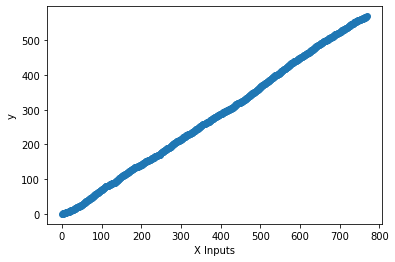

In [112]:
import matplotlib.pyplot as plt

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('X Inputs')
plt.ylabel('y')
plt.show()

# I don't think i'm doing this right

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?